In [1]:
!pip install opencv-python

In [2]:
!pip install basic-image-eda

In [5]:
path = 'C:/Users/User/DS5500/data/archive/real_vs_fake/images/train/real'

In [16]:
!pip install openslide-python

In [9]:
!pip install tensorflow

In [19]:
!pip install Keras-Preprocessing

In [20]:
import os
import pathlib
import math
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import glob

from glob import glob
# from openslide import OpenSlide
from PIL import Image

import PIL
from PIL import Image
import json
import glob
import sklearn
import cv2
import seaborn as sns
import sys
import pandas as pd

from glob import glob
from pprint import pprint
from collections import defaultdict
import gc

import tensorflow as tf
from keras_preprocessing.image import load_img
from keras.layers import (Dense, Flatten, Dropout)
from keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings(action='ignore')

In [21]:
path = 'C:/Users/User/DS5500/data/archive/real_vs_fake/images/'

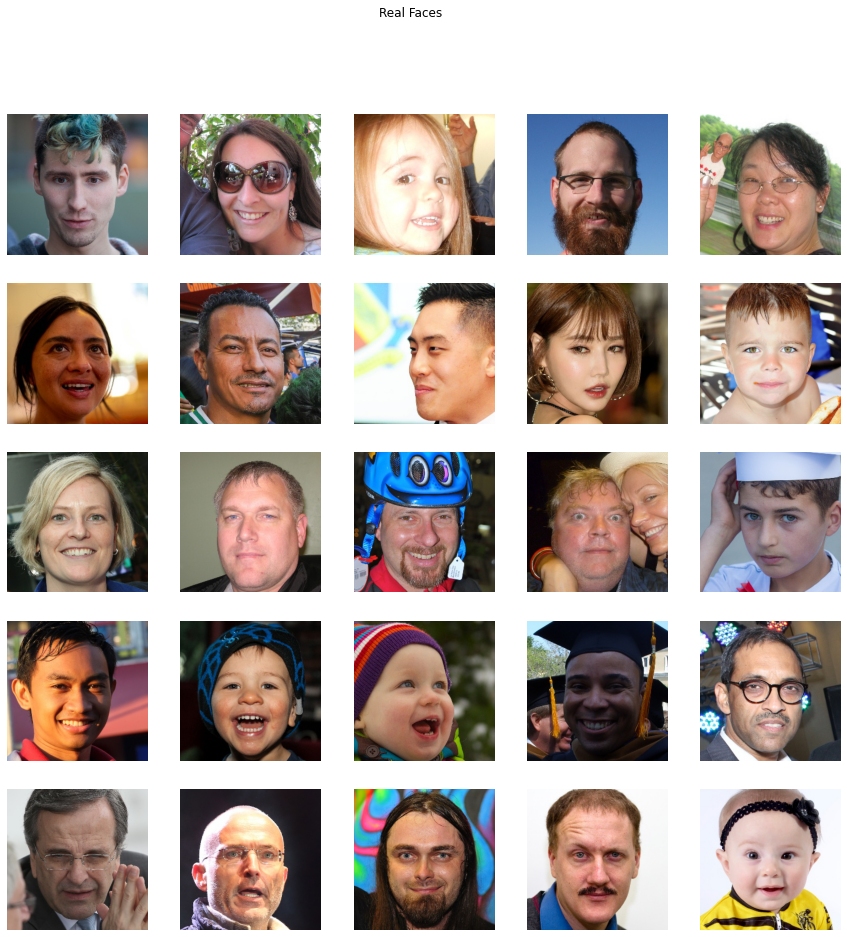

In [30]:
#path = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake'
real_or_fake = 'real'
dir = os.path.join(path, 'train', real_or_fake)
fig, axs = plt.subplots(5,5)
fig.suptitle('Real Faces', fontsize=12)
fig.set_figheight(15)
fig.set_figwidth(15)
k = 10

for i in range(5):
    for j in range(5):
        sample_image = load_img(os.path.join(dir, os.listdir(os.path.join(dir))[k]))
        axs[j,i].imshow(sample_image)
        axs[j,i].axis('off')
        k +=1
plt.show()

In [36]:
# from PIL import Image
# import numpy as np
# import os
# dst_img = 'C:/Users/User/DS5500/data/archive/real_vs_fake/images/train/real'

# #listing files in images folder
# list_img = os.listdir(dst_img)

# #iterating over dst_image to get the images as arrays
# for image in sorted(list_img):
#     [file_name, ext] = os.path.splitext(image) #splitting file name from its extension
#     arr = np.array(Image.open(os.path.join(dst_img, image))) #creating arrays for all the images
#     [h, w] = np.shape(arr)[0:2]#calculating height and width for each image
#     arr_dim = arr.ndim #calculating the dimension for each array
#     arr_shape = arr.shape #calculating the shape for each array
#     if arr_dim == 2:
#         arr_mean = np.mean(arr)
#         print(f'[{file_name}, greyscale={arr_mean:.1f}]')
#     else:
#         arr_mean = np.mean(arr, axis=(0,1))
#         arr_med = np.median(arr, axis=(0,1))
#         if len(arr_mean) == 3: #RGB CASE
#             print(f'Mean values: [{file_name}, R={arr_mean[0]:.1f},  G={arr_mean[1]:.1f}, B={arr_mean[2]:.1f} ]')
#             print(f'Median Values: [{file_name}, R={arr_med[0]:.1f},  G={arr_med[1]:.1f}, B={arr_med[2]:.1f} ]')

In [85]:
from PIL import Image
import numpy as np
import os
dst_img = 'C:/Users/User/DS5500/data/archive/real_vs_fake/images/train/real'

#listing files in images folder
list_img = os.listdir(dst_img)
R_mean_list = []
B_mean_list = []
G_mean_list = []
#iterating over dst_image to get the images as arrays
for image in sorted(list_img):
    #splitting file name from its extension
    [file_name, ext] = os.path.splitext(image) 
    
    #creating arrays for all the images
    arr = np.array(Image.open(os.path.join(dst_img, image)))
    #calculating height and width for each image
    [h, w] = np.shape(arr)[0:2]
    #calculating the dimension for each array
    arr_dim = arr.ndim 
    #calculating the shape for each array
    arr_shape = arr.shape 
    
    arr_mean = np.mean(arr, axis=(0,1))
    arr_med = np.median(arr, axis=(0,1))
    if len(arr_mean) == 3: #RGB CASE
        #print(arr_mean[0])
        R = arr_med[0]
        G = arr_med[1]
        B = arr_med[2]
        #print(R)
        R_mean_list.append(R)
        B_mean_list.append(B)
        G_mean_list.append(G)
        #print(f'Mean values: [{file_name}, R={arr_mean[0]:.1f},  G={arr_mean[1]:.1f}, B={arr_mean[2]:.1f} ]')
        #print(f'Median Values: [{file_name}, R2={arr_med[0]:.1f},  G2={arr_med[1]:.1f}, B2={arr_med[2]:.1f} ]')
        #df = pd.DataFrame(R, columns = ['Red_mean'])

Text(0.5, 1.0, 'RGB Channel Analysis for Real Human Faces')

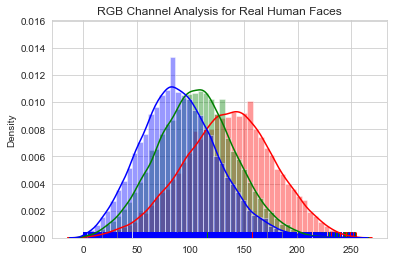

In [87]:
sns.set_style('whitegrid')
sns.distplot(R_mean_list, kde=True, color = 'red', rug=True)
sns.distplot(G_mean_list, kde=True, color = 'green', rug=True)
sns.distplot(B_mean_list, kde=True, color = 'blue', rug=True)
plt.title('RGB Median Channel Analysis for Real Human Faces')

In [88]:
from PIL import Image
import numpy as np
import os
dst_img = 'C:/Users/User/DS5500/data/archive/real_vs_fake/images/train/fake'

#listing files in images folder
list_img = os.listdir(dst_img)
Rf_mean_list = []
Bf_mean_list = []
Gf_mean_list = []
#iterating over dst_image to get the images as arrays
for image in sorted(list_img):
    #splitting file name from its extension
    [file_name, ext] = os.path.splitext(image) 
    
    #creating arrays for all the images
    arr = np.array(Image.open(os.path.join(dst_img, image)))
    #calculating height and width for each image
    [h, w] = np.shape(arr)[0:2]
    #calculating the dimension for each array
    arr_dim = arr.ndim 
    #calculating the shape for each array
    arr_shape = arr.shape 
    
    arr_mean = np.mean(arr, axis=(0,1))
    arr_med = np.median(arr, axis=(0,1))
    if len(arr_mean) == 3: #RGB CASE
        #print(arr_mean[0])
        # change 
        Rf = arr_med[0]
        Gf = arr_med[1]
        Bf = arr_med[2]
        #print(R)
        Rf_mean_list.append(Rf)
        Bf_mean_list.append(Bf)
        Gf_mean_list.append(Gf)
        #print(f'Mean values: [{file_name}, Rf={arr_mean[0]:.1f},  Gf={arr_mean[1]:.1f}, Bf={arr_mean[2]:.1f} ]')
        #print(f'Median Values: [{file_name}, R2={arr_med[0]:.1f},  G2={arr_med[1]:.1f}, B2={arr_med[2]:.1f} ]')
        #df = pd.DataFrame(R, columns = ['Red_mean'])

Text(0.5, 1.0, 'RGB Channel Analysis for Fake Human Faces')

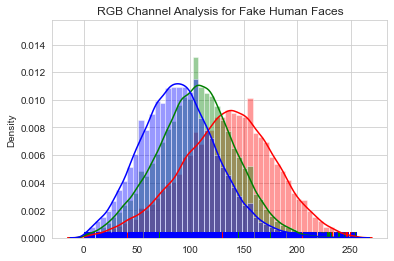

In [89]:
sns.set_style('whitegrid')
sns.distplot(Rf_mean_list, kde=True, color = 'red', rug=True)
sns.distplot(Gf_mean_list, kde=True, color = 'green', rug=True)
sns.distplot(Bf_mean_list, kde=True, color = 'blue', rug=True)
plt.title('RGB Median  Channel Analysis for Fake Human Faces')

In [27]:
# from keras.preprocessing import image

# for data, location in zip([train, test],[train_img_path, test_img_path]):
#     print(data)
#     images = data['img_name'].values
#     reds = np.zeros(images.shape[0])
#     greens = np.zeros(images.shape[0])
#     blues = np.zeros(images.shape[0])
#     mean = np.zeros(images.shape[0])
#     x = np.zeros(images.shape[0], dtype=int)
#     y = np.zeros(images.shape[0], dtype=int)
#     for i, path in enumerate(tqdm(images)):
#         img = np.array(image.load_img(os.path.join(location, f'{path}.jpg')))
#         reds[i] = np.mean(img[:,:,0].ravel())
#         greens[i] = np.mean(img[:,:,1].ravel())
#         blues[i] = np.mean(img[:,:,2].ravel())
#         mean[i] = np.mean(img)
#         x[i] = img.shape[1]
#         y[i] = img.shape[0]
#     data['reds'] = reds
#     data['greens'] = greens
#     data['blues'] = blues
#     data['mean_colors'] = mean
#     data['width'] = x
#     data['height'] = y

# train['total_pixels']= train['width']*train['height']
# test['total_pixels']= test['width']*test['height']
# train['res'] = train['width'].astype(str) + 'x' + train['height'].astype(str)
# test['res'] = test['width'].astype(str) + 'x' + test['height'].astype(str)

C:/Users/User/DS5500/data/archive/real_vs_fake/images/train/real


TypeError: string indices must be integers

In [ ]:
# # Creating a customized chart and giving in figsize etc.

# fig = plt.figure(constrained_layout=True, figsize=(20, 12))

# # Creating a grid

# grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

# # Customizing the first grid.

# ax1 = fig.add_subplot(grid[0, :2])

# # Set the title.

# ax1.set_title('RGB Channels of Benign Images')


In [12]:
# # Plot.

# sns.distplot(train[train['target'] == 0].reds,
#              hist_kws={
#                  'rwidth': 0.75,
#                  'edgecolor': 'black',
#                  'alpha': 0.3
#              },
#              color='red',
#              kde=True,
#              ax=ax1,
#              label='Reds')
# sns.distplot(train[train['target'] == 0].greens,
#              hist_kws={
#                  'rwidth': 0.75,
#                  'edgecolor': 'black',
#                  'alpha': 0.3
#              },
#              color='green',
#              kde=True,
#              ax=ax1,
#              label='Greens')
# sns.distplot(train[train['target'] == 0].blues,
#              hist_kws={
#                  'rwidth': 0.75,
#                  'edgecolor': 'black',
#                  'alpha': 0.3
#              },
#              color='blue',
#              kde=True,
#              ax=ax1,
#              label='Blues')

# ax1.legend()
# # Customizing the second grid.

# ax2 = fig.add_subplot(grid[1, :2])

# # Set the title.

# ax2.set_title('RGB Channels of Malignant Images')

NameError: name 'train' is not defined

In [ ]:
# Plot

# sns.distplot(train[train['target'] == 1].reds,
#              hist_kws={
#                  'rwidth': 0.75,
#                  'edgecolor': 'black',
#                  'alpha': 0.3
#              },
#              color='red',
#              kde=True,
#              ax=ax2,
#              label='Reds')
# sns.distplot(train[train['target'] == 1].greens,
#              hist_kws={
#                  'rwidth': 0.75,
#                  'edgecolor': 'black',
#                  'alpha': 0.3
#              },
#              color='green',
#              kde=True,
#              ax=ax2,
#              label='Greens')
# sns.distplot(train[train['target'] == 1].blues,
#              hist_kws={
#                  'rwidth': 0.75,
#                  'edgecolor': 'black',
#                  'alpha': 0.3
#              },
#              color='blue',
#              kde=True,
#              ax=ax2,
#              label='Blues')

# ax2.legend()

# # Customizing the third grid.

# ax3 = fig.add_subplot(grid[:, 2])

# # Set the title.

# ax3.set_title('Mean Colors by Train/Test Images')
# # Plot

# sns.kdeplot(train.mean_colors,
#             shade=True,
#             label='Train',
#             ax=ax3,
#             color='#171820',
#             vertical=True)
# sns.kdeplot(test.mean_colors,
#             shade=True,
#             label='Test',
#             ax=ax3,
#             color='#fdc029',
#             vertical=True)
# ax3.legend()

# plt.show()